# 데이터 탐색
* 데이터의 요약이나 통계 정보를 출력

## 탐색적 시각화이용 - EDA

#### 1. 히스토그램 
* 빈도 분석을 위해서 그리는 차트 
* 변수가 하나인 단변수 데이터의 빈도수를 표현

In [1]:
import numpy as numpy
import pandas as pd

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
	rc('font',family=font_name)

사과      4
바나나     3
포도      5
복숭아    11
체리      8
Name: 선호과일, dtype: int64


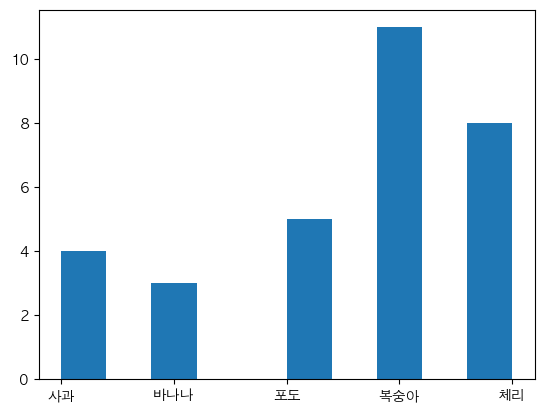

In [20]:
df=pd.read_csv('./data/lovefruits.csv',sep=',',encoding='cp949')
# 정보 확인
# print(df.info())

# 빈도수 확인
data=df['선호과일'].value_counts(sort=False)
print(data)
# 막대그래프 그리기
# plt.bar(data.index,data.values)

plt.hist(df['선호과일'])
plt.show()

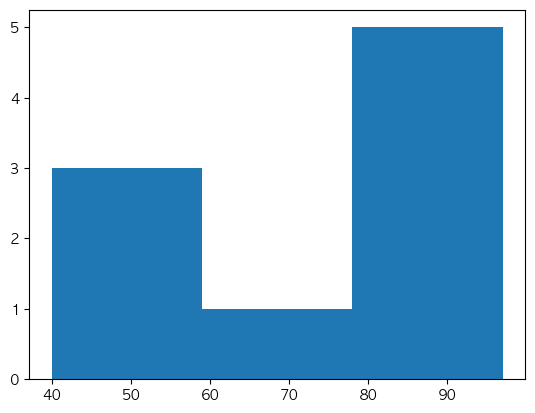

In [23]:
df1=pd.read_csv('./data/student.csv',encoding='cp949')
# df1.info()
# 점수처럼 여러 값이 존재하는 경우는 되도록이면 구간별로 히스토그램을 그리는것이 좋다. 
# 40-50, 6-70, 8-90
plt.hist(df1['수학'],bins=3)
plt.show()

### Scatter

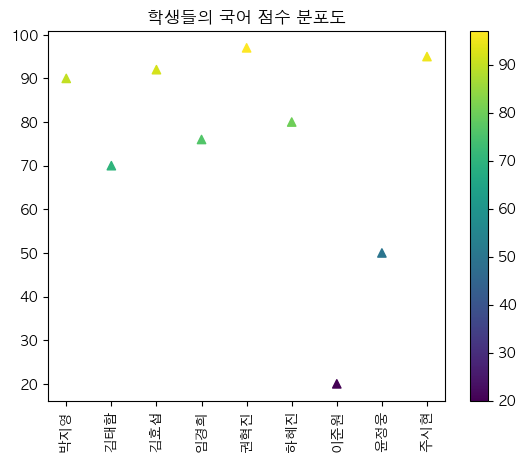

In [39]:
df=pd.read_csv('./data/student.csv',encoding='cp949')
colormap=df['국어'].values
plt.figure()
plt.scatter(x=df.index,y=df['국어'],marker='^',c=colormap)
plt.xticks(range(0,len(df['국어']),1),df['이름'],rotation='vertical')
plt.colorbar()
plt.title("학생들의 국어 점수 분포도")

plt.show()

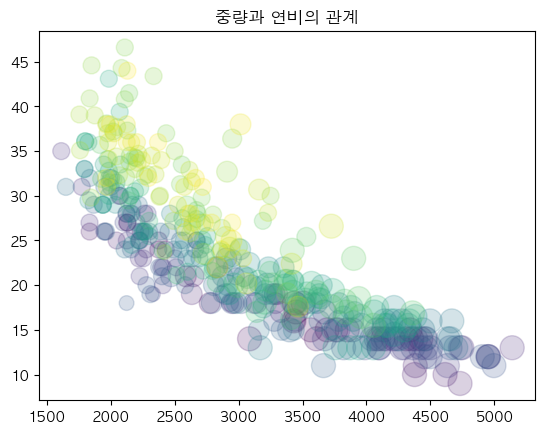

In [55]:
# 여러개의 컬럼을 이용한 산포도
df=pd.read_csv('./data/noheader_auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

# 존재하지 않는 컬럼 추가
df['cylinders_size']=df['cylinders']/df.cylinders.max()*300
colormap=df.index
plt.scatter(x=df['weight'],y=df['mpg'],s=df['cylinders_size'],c=colormap,alpha=0.2)
plt.title("중량과 연비의 관계")
plt.show()

### Pie chart

<class 'pandas.core.series.Series'>


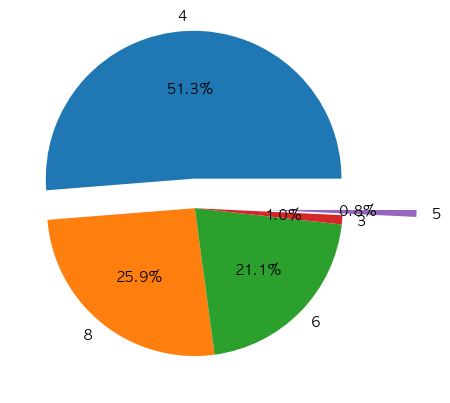

In [60]:
x=df['cylinders'].value_counts()
print(type(x))
# 중점으로부터 떨어뜨리는 비율
explode=(0.2,0,0,0,0.5)
plt.pie(x,labels=x.index,autopct='%1.1f%%',explode=explode)
plt.show()

### Boxplot

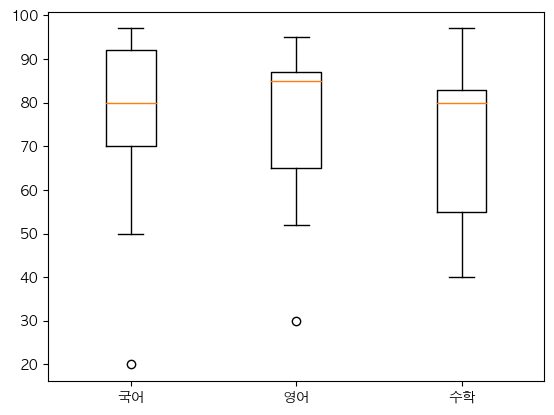

In [66]:
student=pd.read_csv('./data/student.csv',encoding='cp949')
plt.boxplot((student['국어'],student['영어'],student['수학']),labels=('국어','영어','수학'))
# 데이터는 sequence 로 넣어야 하기 때문에 리스트나 튜플 등의 형태로 넣어야 한다. 
plt.show()

# Seaborn

In [71]:
import seaborn as sns

tips=sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


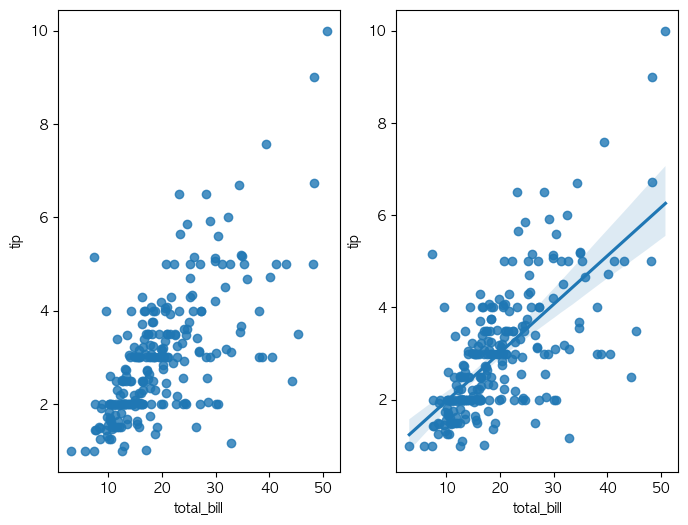

In [75]:
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x="total_bill",y="tip",data=tips,fit_reg=False,ax=ax1)
sns.regplot(x='total_bill',y='tip',data=tips,fit_reg=True,ax=ax2) # fit_reg : 회귀선을 그려주는 함수. 
plt.show()

# folium

In [ ]:
import folium

# 지도를 생성 - location 은 중앙점의 위치이고 zoom_start 는 확대 축소 배율
m=folium.Map(location=[37.496237122,126.953697779],zoom_start=15)
# 마커 출력
folium.Marker(location=[37.496237122,126.953697779],popup="Soongsil univ",icon=folium.Icon(icon='flag')).add_to(m)
folium.Marker(location=[37.4942627,126.9583153],popup="My house",icon=folium.Icon(icon='home')).add_to(m)
folium.RegularPolygonMarker(location=[37.496237122,126.953697779],popup="Soongsil univ",number_of_sides=6,color='red',radius=50).add_to(m)


# m.save("map.html")
m

### 서울대학 좌표찍기

In [ ]:
univ=pd.read_excel('./data/서울지역_대학교_위치.xlsx')

# univ.head()
# univ.info()

m=folium.Map(location=[37.55,126.98],zoom_start=12)
m

In [ ]:
# DataFrame 의 데이터 순회
m=folium.Map(location=[37.55,126.98],zoom_start=12)
for name,lat,lng in zip(univ['Unnamed: 0'],univ['위도'],univ['경도']):
    folium.CircleMarker([lat,lng],popup=name,radius=10,fill=True,fill_color="coral",fill_opacity=0.7,color='blue').add_to(m)
m


### 경기도 인구 단계 구분도

In [ ]:
# json 파싱을 위한 패키지
import json

# 경기도 인구 데이터 가져오기
df=pd.read_excel('./data/경기도인구데이터.xlsx')
df.head()

# 컬럼의 이름이 숫자 형태라 사용하기가 번거로울 수 있다. 문자열로 변경. 
df.columns=df.columns.map(str)

# 행정 구역 경계와 관련된 json 파일을 열어서 파싱
try:
	geo_data=json.load(open('./data/경기도행정구역경계.json',encoding='utf-8'))
except:
	geo_data=json.load(open('./data/경기도행정구역경계.json',encoding='utf-8-sig'))

# 지도 생성
g_map=folium.Map(location=[37.5502,126.982],zoom_start=10,tiles='Stamen Terrain')
df.index=df['구분']

folium.Choropleth(geo_data=geo_data,data=df['2007'],columns=[df.index,df['2007']],fill_color='YlOrRd'
		  ,fill_opacity=0.7,line_opacity=0.3,threshold_scale=[10000,100000,300000,500000,700000]
		  ,key_on='feature.properties.name',).add_to(g_map)



g_map

# pandas 에서 시각화

<Axes: >

/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


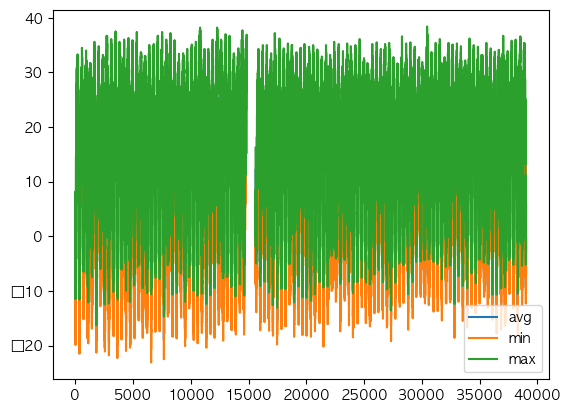

In [153]:
df=pd.read_csv('./data/seoul.csv',encoding='cp949')
df.plot()

<Axes: xlabel='date'>

/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/kimjimin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


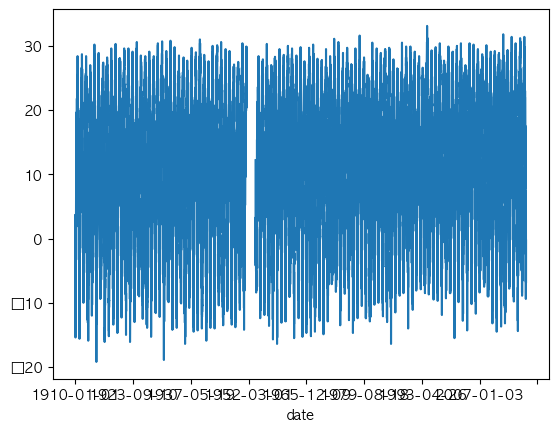

In [154]:
df.index=df['date']
df['avg'].plot()

# pandas 활용

### 중복 데이터 처리

In [10]:
import pandas as pd
df=pd.DataFrame([['안녕하세요','니하오','헬로우','키아 오라','안녕하세요'],['한국','중국','미국','뉴질랜드','한국']])
df=df.T
# print(df.duplicated())
df.drop_duplicates(inplace=True)
df

,0,1
0,안녕하세요,한국
1,니하오,중국
2,헬로우,미국
3,키아 오라,뉴질랜드


### Apply

In [15]:
df=pd.DataFrame([['안녕하세요','니하오','헬로우','키아 오라','안녕하세요'],['한국','중국','미국','뉴질랜드','한국']])
df=df.T
# print(df.duplicated())
df.drop_duplicates(inplace=True)
df
def f(data):
    return data+'...'
print(df[0].apply(lambda data : data+'...'))
df.apply(f,axis=0)  # - DF 는 행이나 열단위 적용

print(df.apply(lambda x:x+'...'))
print(df.applymap(f))

0    안녕하세요...
1      니하오...
2      헬로우...
3    키아 오라...
Name: 0, dtype: object
          0        1
0  안녕하세요...    한국...
1    니하오...    중국...
2    헬로우...    미국...
3  키아 오라...  뉴질랜드...
          0        1
0  안녕하세요...    한국...
1    니하오...    중국...
2    헬로우...    미국...
3  키아 오라...  뉴질랜드...


In [23]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
# titanic

df=titanic[['age','fare']]
print(df.head())

def min_max(data):
    return data.min()
# 열단위 함수 적용
print(df.apply(min_max,axis=0)) # age의 최대, 최소값이 들어가 버린것.


    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
age     0.42
fare    0.00
dtype: float64
0       7.250
1      38.000
2       7.925
3      35.000
4       8.050
        ...  
886    13.000
887    19.000
888    23.450
889    26.000
890     7.750
Length: 891, dtype: float64


In [34]:
# titanic.head()
df=titanic[['age','fare']]
# print(type(df))

# 하나의 데이터를 가지고 null 여부를 판단해주는 함수를 대입
# 셀단위로 적용해서 DataFrame 을 리턴

# print(df.pipe(lambda x:x.isnull()))

def missing_value(x):
    return x.isnull()

# 집계를 하는 함수를 대입하면 열 단위로 대입해서 집계를 수행한 후 Series 를 리턴
print(df.pipe(lambda x:missing_value(x).sum))

def missing_count(x):
    return missing_value(x).sum()
print(df.pipe(lambda x: missing_count(x).sum()))

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age   fare
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
886  False  False
887  False  False
888   True  False
889  False  False
890  False  False

[891 rows x 2 columns]>
177


### 열편집

In [52]:
print(int(987/100))
print(int((987-int(987//100)*100)/10))
print(int(987%10))

9
8
7


In [53]:
df=pd.read_excel('./data 3/주가데이터.xlsx')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [63]:
# 자료형이 datatime64 라서 split사용 불가
#print(df['연월일'].split('-'))

# 데이터 타입 변경
# astype 호출해서 변경
# map 함수에 형을 변경할 수 있는 함수 대입
df['연월일']=df['연월일'].astype('str')
date=df['연월일'].str.split('-')
df['연']=date.str.get(0)
df['월']=date.str.get(1)
df['일']=date.str.get(2)
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018,06,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018,06,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018,06,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018,06,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018,06,19


### 데이터 결합


In [71]:
df1=pd.DataFrame({'a':['a0','a1','a2','a3'],
                  'b':['b0','b1','b2','b3'],
                  'd':['d0','d1','d2','d3'],
				  },index=[1,2,3,4])

df2=pd.DataFrame({'a':['a2','a3','a4','a5'],
                  'b':['b2','b3','b4','b5'],
                  'c':['c2','c3','c4','c5'],
				  },index=[2,3,4,5])
# print(df1)
# print(df2)

pd.concat([df1,df2]) # 동일한 컬럼은 값이 있지만 한쪽에만 존재하는 컬럼은 반대쪽을 NaN 으로 만든다. 

print(pd.concat([df1,df2],axis=1)) # 동일한 인덱스끼리 합쳐짐
# 한쪽에만 존재하는 데이터도 결합 - outer join

print(pd.concat([df1,df2],axis=1,join='inner')) # 동일한 인덱스끼리 옆으로 합쳐짐
# inner join


     a    b    d    a    b    c
1   a0   b0   d0  NaN  NaN  NaN
2   a1   b1   d1   a2   b2   c2
3   a2   b2   d2   a3   b3   c3
4   a3   b3   d3   a4   b4   c4
5  NaN  NaN  NaN   a5   b5   c5
    a   b   d   a   b   c
2  a1  b1  d1  a2  b2  c2
3  a2  b2  d2  a3  b3  c3
4  a3  b3  d3  a4  b4  c4


In [72]:
print(df1.append(df2))# concat 과 동일. 

    a   b    d    c
1  a0  b0   d0  NaN
2  a1  b1   d1  NaN
3  a2  b2   d2  NaN
4  a3  b3   d3  NaN
2  a2  b2  NaN   c2
3  a3  b3  NaN   c3
4  a4  b4  NaN   c4
5  a5  b5  NaN   c5


/var/folders/jv/jrhq9b3j1r71dg847_hrmn_m0000gn/T/ipykernel_42116/1388991793.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1.append(df2))


In [80]:
import numpy as np
a=pd.Series([np.nan,2.5,np.nan,3.5,4.5,np.nan])
b=pd.Series(np.arange(len(a),dtype=np.float64))
# print(a,b)

#a 의 값이 NaN 인 경우 b의 값으로 채우기
r=np.where(pd.isnull(a),b,a)
# 조건이 True 인 경우 데이터1 , False 인 경우 데이터2
print(pd.Series(r))

print(a.combine_first(b))

# numpy의 1차원 배열은 출력할 때 행방향으로 출력한다. -> series로 변경해서 출력 가능. 


0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    5.0
dtype: float64
0    0.0
1    2.5
2    2.0
3    3.5
4    4.5
5    5.0
dtype: float64


In [92]:
price=pd.read_excel('./data 3/stock price.xlsx')
valuation=pd.read_excel('./data 3/stock valuation.xlsx')
# print(valuation.head())
# print(price.head())

inner_join=pd.merge(price,valuation)



In [91]:
outer_join=pd.merge(price,valuation,how='outer')
outer_join

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [98]:
price=pd.read_excel('./data 3/stock price.xlsx',index_col='id')
valuation=pd.read_excel('./data 3/stock valuation.xlsx',index_col='id')

print(price.join(valuation)) #인스턴스로 메서드 호출 : bound 호출
print(pd.DataFrame.join(price,valuation)) # 클래스로 인스턴스 매서드 호출 : unbound 호출



       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN